In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import ConnectionPatch
from utility import *
%load_ext autoreload
%matplotlib inline


In [2]:
bladerf = '../raw data/bladerf/bladerf.iq'
hackrf0 = '../raw data/hackrf0/hackrf0.iq'
hackrf1 = '../raw data/hackrf1/hackrf1.iq'
limesdr = '../raw data/limesdr/limesdr.iq'
arr1= np.fromfile(bladerf, dtype=np.complex64)
arr2= np.fromfile(hackrf0, dtype=np.complex64)
arr3= np.fromfile(hackrf1, dtype=np.complex64)
arr4= np.fromfile(limesdr, dtype=np.complex64)
print(len(arr1), len(arr2), len(arr3), len(arr4))
# 1.2. 去除直流分量
arr1 -= np.mean(arr1)
arr2 -= np.mean(arr2)
arr3 -= np.mean(arr3)
arr4 -= np.mean(arr4)
arr1 /= np.max(np.abs(arr1))
arr2 /= np.max(np.abs(arr2))
arr3 /= np.max(np.abs(arr3))
arr4 /= np.max(np.abs(arr4))

constellation_points = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j])
data_sets = [arr1[1000 : len(arr1) // 4000], arr2[1000 : len(arr2) // 4000], arr3[1000 : len(arr3) // 4000], arr4[1000 : len(arr4) // 4000]]
d = ['bladerf', 'hackrf0', 'hackrf1', 'limesdr']

50000000 50000000 50000000 50000000


In [3]:
arr= np.fromfile(limesdr, dtype=np.complex64)#按8位数据读取iq数据
arr = arr[0:1024]
# 采样率为4M
fs = 4e6
# 中心频率为 2.4 GHz
center_frequency = 2.4e9
# 构建时间轴
time = np.arange(0, len(arr)) * (1/fs)
# time = np.arange(len(arr))

# plt.figure(figsize=(10, 6))
# plt.plot(time, np.real(arr), label='Real Part', color='black')
# plt.plot(time, np.imag(arr), label='Imaginary Part', color='red')
# plt.title('Baseband IQ Data Waveform')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()

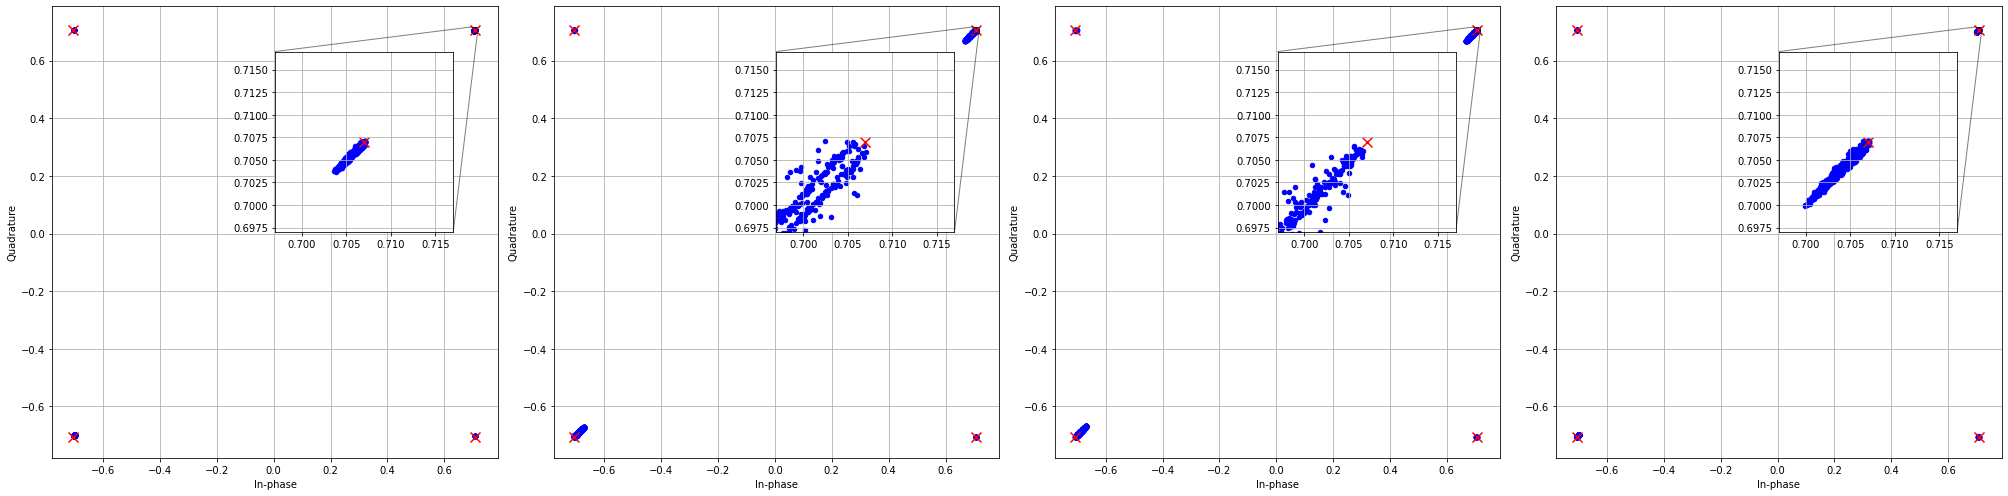

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7))  # 2x2 grid for four data sets
# Loop over each dataset and each axis
for ax, data, name in zip(axes.flatten(), data_sets, d):
    # Process data
    point1 = data[1000:len(data)//4]
    x = np.real(point1)
    y = np.imag(point1)
    
    # Plot main constellation points
    ax.scatter(x, y, marker='o', color='b', s=20)  # Removed label for legend
    ax.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', s=100)  # Removed label for legend
    
    # Setting labels and grid
    ax.set_xlabel('In-phase')
    ax.set_ylabel('Quadrature')
    # ax.set_title(name)
    ax.grid(True)
    
    # Adding a zoomed-in inset
    zoom_center = constellation_points[0]
    zoom_radius = 0.01
    ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])  # Position inset
    ax_inset.scatter(x, y, marker='o', color='b', s=20)
    ax_inset.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', s=100)
    ax_inset.set_xlim(np.real(zoom_center) - zoom_radius, np.real(zoom_center) + zoom_radius)
    ax_inset.set_ylim(np.imag(zoom_center) - zoom_radius, np.imag(zoom_center) + zoom_radius)
    ax_inset.grid(True)
    ax.indicate_inset_zoom(ax_inset, edgecolor="black")

# Show the full plot
plt.tight_layout()
plt.savefig('./img/constellation_raw.png',dpi=600, bbox_inches='tight')
plt.show()

11500


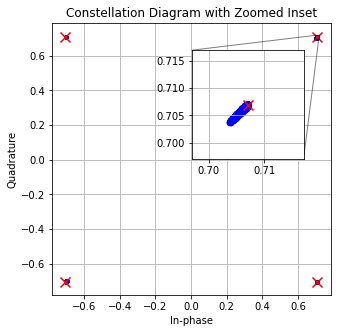

In [5]:
# 绘制原始星座图
point1 = arr1[1000 : len(arr1) // 4000]
x = np.real(point1)
print(len(x))
y =  np.imag(point1)
# Create the main figure and axis
fig, ax = plt.figure(figsize=(5, 5)), plt.gca()

# Scatter plot for the extracted points
ax.scatter(x, y, color='blue', marker='.', alpha=0.5, label='Received Points')

# Ideal mapping points
ax.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', s=100, label='Ideal Mapping')

# Setting labels and title
ax.set_xlabel('In-phase')
ax.set_ylabel('Quadrature')
ax.set_title("Constellation Diagram with Zoomed Inset")
ax.grid(True)
# ax.legend()

# Define a region of interest for the zoomed-in subplot
# We'll zoom around the first ideal point for demonstration
zoom_center = constellation_points[0]
zoom_radius = 0.01

# Adding an inset with a zoomed view around the zoom_center
ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])  # Inset axes: [x, y, width, height]
ax_inset.scatter(x, y, marker='o', color='b', s=20)
ax_inset.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', s=100)
ax_inset.set_xlim(np.real(zoom_center) - zoom_radius, np.real(zoom_center) + zoom_radius)
ax_inset.set_ylim(np.imag(zoom_center) - zoom_radius, np.imag(zoom_center) + zoom_radius)
ax_inset.grid(True)

# Connect the inset with the main plot
ax.indicate_inset_zoom(ax_inset, edgecolor="black")

# Show the plot
plt.show()

11500


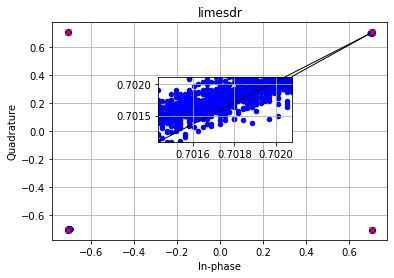

In [6]:

# 绘制原始星座图
point1 = arr4[1000 : len(arr4) // 4000]
x = np.real(point1)
print(len(x))
y =  np.imag(point1)
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o', color='b', s=20)
ax.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
ax.grid(True)
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title("limesdr")
# 嵌入绘制局部放大图的坐标系
axins = inset_axes(ax, width="40%", height="30%",loc='center left',
                   bbox_to_anchor=(0.3, 0.1, 1, 1),
                   bbox_transform=ax.transAxes)
axins.scatter(x, y, marker='o', color='b', s=20)
axins.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')

# 设置放大区间
zone_left = 20
zone_right = 30
# 坐标轴的扩展比例（根据实际数据调整）
x_ratio = 1 # x轴显示范围的扩展比例
y_ratio = 1 # y轴显示范围的扩展比例
# X轴的显示范围
xlim0 = x[zone_left]-(x[zone_right]-x[zone_left])*x_ratio
xlim1 = x[zone_right]+(x[zone_right]-x[zone_left])*x_ratio

# Y轴的显示范围
y = np.hstack((y[zone_left:zone_right], np.imag(constellation_points)[zone_left:zone_right]))
ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio


# 调整子坐标系的显示范围
axins.set_xlim(xlim0, xlim1)
axins.set_ylim(ylim0, ylim1)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='k', lw=1)
axins.grid(True)
# plt.savefig('limesdr_con.png',dpi=600, bbox_inches='tight')
plt.show()

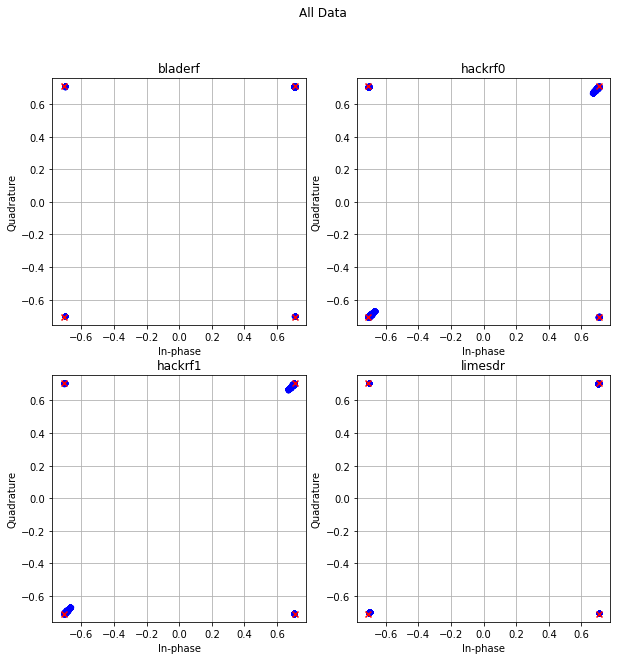

In [7]:
# arr1= np.fromfile(bladerf, dtype=np.complex64)
# arr2= np.fromfile(hackrf0, dtype=np.complex64)
# arr3= np.fromfile(hackrf1, dtype=np.complex64)
# arr4= np.fromfile(limesdr, dtype=np.complex64)
# print(len(arr1), len(arr2), len(arr3), len(arr4))
# # 1.2. 去除直流分量
# arr1 -= np.mean(arr1)
# arr2 -= np.mean(arr2)
# arr3 -= np.mean(arr3)
# arr4 -= np.mean(arr4)
# arr1 /= np.max(np.abs(arr1))
# arr2 /= np.max(np.abs(arr2))
# arr3 /= np.max(np.abs(arr3))
# arr4 /= np.max(np.abs(arr4))

# 1.4. 加性高斯白噪声
# SNR_dB = 80  # 信噪比（单位：dB）
# sigma = np.sqrt(0.5 / (10**(SNR_dB / 10)))  # 计算标准差
# arr += sigma * (np.random.randn(len(arr)) + 1j * np.random.randn(len(arr)))

constellation_points = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j])

# 创建四个子图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# 绘制星座图
plt.subplot(2, 2, 1)
point1 = arr1[1000 : len(arr1) // 4000]
plt.scatter(np.real(point1), np.imag(point1), marker='o', color='b', s=20)
plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title('bladerf')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 2)
point2 = arr2[1000 : len(arr2) // 4000]
plt.scatter(np.real(point2), np.imag(point2), marker='o', color='b', s=20)
plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title('hackrf0')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 3)
point3 = arr3[1000 : len(arr3) // 4000]
plt.scatter(np.real(point3), np.imag(point3), marker='o', color='b', s=20)
plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title('hackrf1')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 4)
point4 = arr4[1000 : len(arr4) // 4000]
plt.scatter(np.real(point4), np.imag(point4), marker='o', color='b', s=20)
plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title('limesdr')
plt.grid(True)
plt.axis('equal')

plt.suptitle('All Data')
plt.show()

<ipython-input-8-26805b663651>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


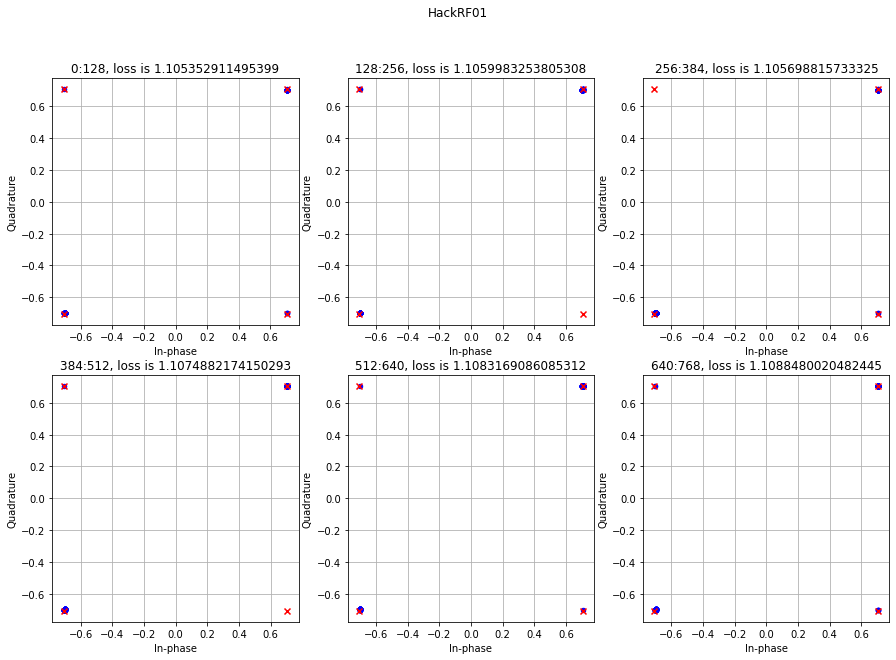

In [8]:
arr= np.fromfile(bladerf, dtype=np.complex64)#按8位数据读取iq数据

# 1.2. 去除直流分量
arr -= np.mean(arr)

# 1.3. 归一化信号幅度
arr /= np.max(np.abs(arr))

# 1.4. 加性高斯白噪声
# SNR_dB = 80  # 信噪比（单位：dB）
# sigma = np.sqrt(0.5 / (10**(SNR_dB / 10)))  # 计算标准差
# arr += sigma * (np.random.randn(len(arr)) + 1j * np.random.randn(len(arr)))

constellation_points = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j])

# 创建四个子图
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

sym = 128
# 绘制星座图
for i in range(1, 7):
    plt.subplot(2, 3, i)
    tmp = arr[(i - 1)*sym : i * sym]
    plt.scatter(np.real(tmp), np.imag(tmp), marker='o', color='b', s=20)
    plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    # 计算每个符号相对于理想位置的偏差
    ideal_symbols = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j]) / np.sqrt(2)  # QPSK的理想星座图点
    deviation = np.abs(tmp - ideal_symbols[:, np.newaxis])
    # 计算平均偏差
    mean_deviation = np.mean(deviation)
    plt.title(str((i - 1)*sym)+':'+str(i * sym)+', loss is '+str(mean_deviation))
    plt.grid(True)
    plt.axis('equal')  # 使坐标轴等比例显示


plt.suptitle('HackRF01')
plt.show()

<ipython-input-9-c8e175524349>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


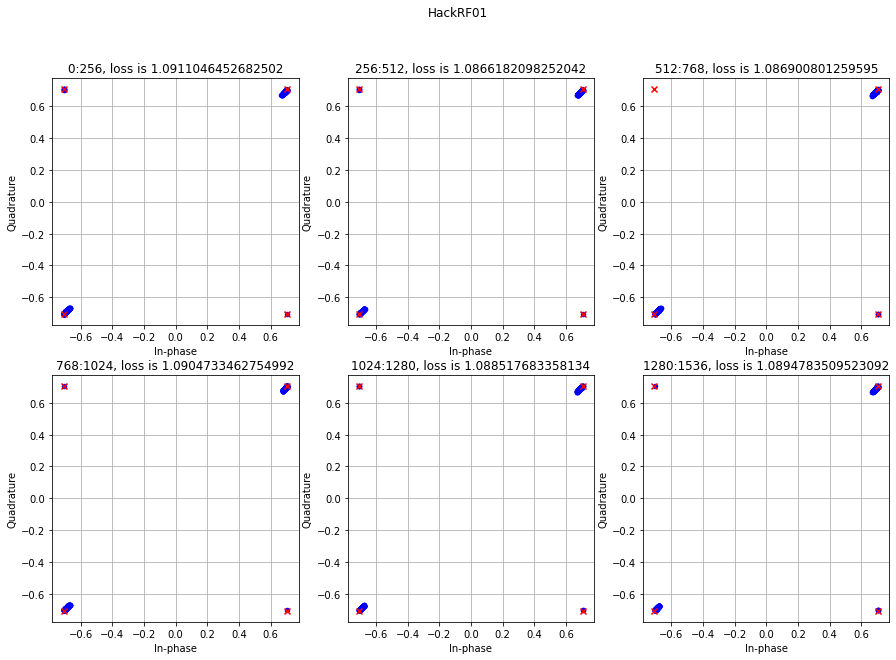

In [9]:
arr= np.fromfile(hackrf0, dtype=np.complex64)#按8位数据读取iq数据

# 1.2. 去除直流分量
arr -= np.mean(arr)

# 1.3. 归一化信号幅度
arr /= np.max(np.abs(arr))

# 1.4. 加性高斯白噪声
# SNR_dB = 80  # 信噪比（单位：dB）
# sigma = np.sqrt(0.5 / (10**(SNR_dB / 10)))  # 计算标准差
# arr += sigma * (np.random.randn(len(arr)) + 1j * np.random.randn(len(arr)))

constellation_points = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j])

# 创建四个子图
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# 绘制星座图
for i in range(1, 7):
    plt.subplot(2, 3, i)
    tmp = arr[(i - 1)*256 : i * 256]
    plt.scatter(np.real(tmp), np.imag(tmp), marker='o', color='b', s=20)
    plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    # 计算每个符号相对于理想位置的偏差
    ideal_symbols = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j]) / np.sqrt(2)  # QPSK的理想星座图点
    deviation = np.abs(tmp - ideal_symbols[:, np.newaxis])
    # 计算平均偏差
    mean_deviation = np.mean(deviation)
    plt.title(str((i - 1)*256)+':'+str(i * 256)+', loss is '+str(mean_deviation))
    plt.grid(True)
    plt.axis('equal')  # 使坐标轴等比例显示


plt.suptitle('HackRF01')
plt.show()

<ipython-input-10-e24326dfa375>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


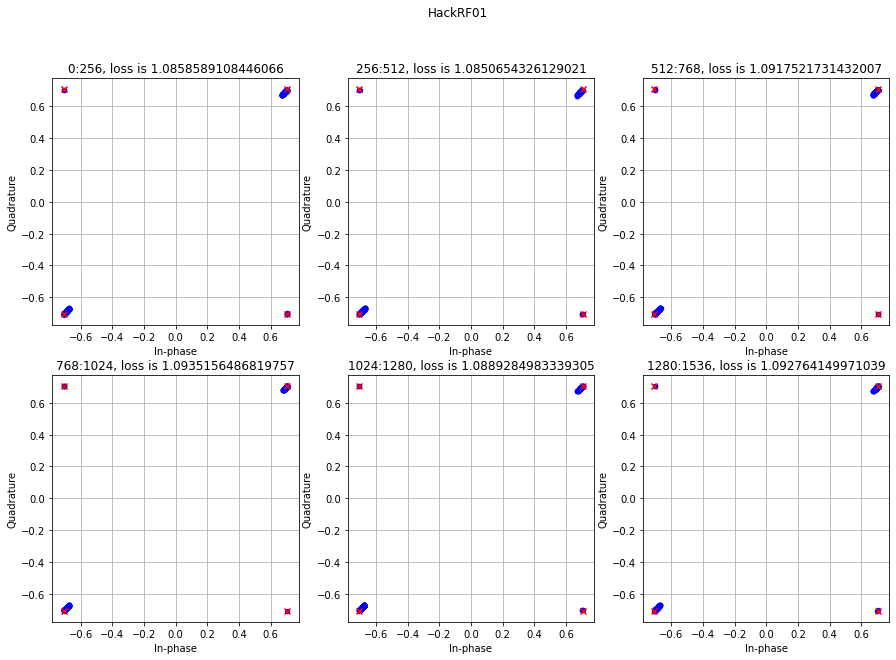

In [10]:
arr= np.fromfile(hackrf1, dtype=np.complex64)#按8位数据读取iq数据

# 1.2. 去除直流分量
arr -= np.mean(arr)

# 1.3. 归一化信号幅度
arr /= np.max(np.abs(arr))

# 1.4. 加性高斯白噪声
# SNR_dB = 80  # 信噪比（单位：dB）
# sigma = np.sqrt(0.5 / (10**(SNR_dB / 10)))  # 计算标准差
# arr += sigma * (np.random.randn(len(arr)) + 1j * np.random.randn(len(arr)))

constellation_points = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j])

# 创建四个子图
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# 绘制星座图
for i in range(1, 7):
    plt.subplot(2, 3, i)
    tmp = arr[(i - 1)*256 : i * 256]
    plt.scatter(np.real(tmp), np.imag(tmp), marker='o', color='b', s=20)
    plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    # 计算每个符号相对于理想位置的偏差
    ideal_symbols = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j]) / np.sqrt(2)  # QPSK的理想星座图点
    deviation = np.abs(tmp - ideal_symbols[:, np.newaxis])
    # 计算平均偏差
    mean_deviation = np.mean(deviation)
    plt.title(str((i - 1)*256)+':'+str(i * 256)+', loss is '+str(mean_deviation))
    plt.grid(True)
    plt.axis('equal')  # 使坐标轴等比例显示


plt.suptitle('HackRF01')
plt.show()

<ipython-input-11-0f71178a5705>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


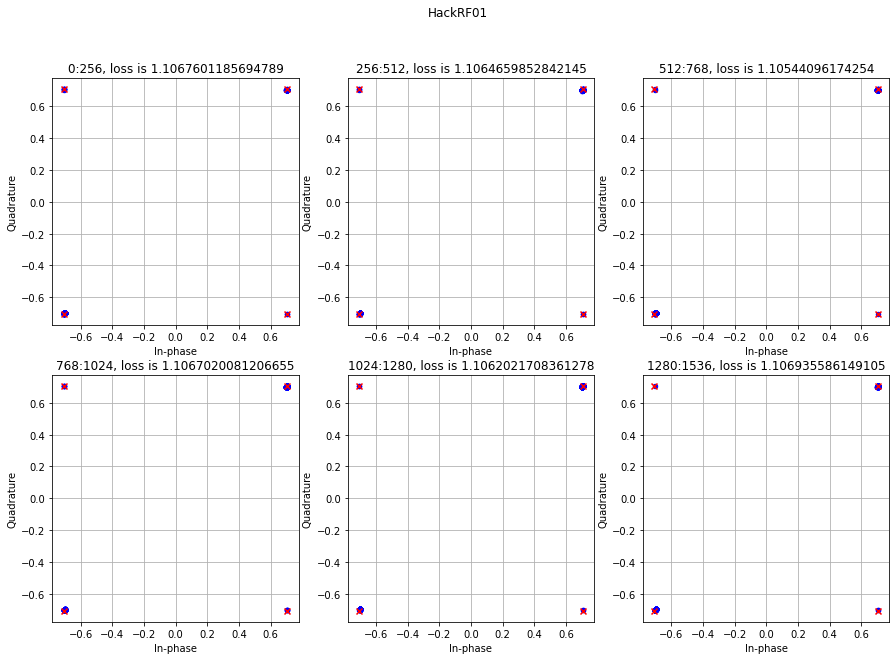

In [11]:
arr= np.fromfile(limesdr, dtype=np.complex64)#按8位数据读取iq数据

# 1.2. 去除直流分量
arr -= np.mean(arr)

# 1.3. 归一化信号幅度
arr /= np.max(np.abs(arr))

# 1.4. 加性高斯白噪声
# SNR_dB = 80  # 信噪比（单位：dB）
# sigma = np.sqrt(0.5 / (10**(SNR_dB / 10)))  # 计算标准差
# arr += sigma * (np.random.randn(len(arr)) + 1j * np.random.randn(len(arr)))

constellation_points = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j])

# 创建四个子图
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# 绘制星座图
for i in range(1, 7):
    plt.subplot(2, 3, i)
    tmp = arr[(i - 1)*256 : i * 256]
    plt.scatter(np.real(tmp), np.imag(tmp), marker='o', color='b', s=20)
    plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='x', color='r', label='Ideal Mapping')
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    # 计算每个符号相对于理想位置的偏差
    ideal_symbols = np.array([0.707+0.707j, -0.707+0.707j, -0.707-0.707j, 0.707-0.707j]) / np.sqrt(2)  # QPSK的理想星座图点
    deviation = np.abs(tmp - ideal_symbols[:, np.newaxis])
    # 计算平均偏差
    mean_deviation = np.mean(deviation)
    plt.title(str((i - 1)*256)+':'+str(i * 256)+', loss is '+str(mean_deviation))
    plt.grid(True)
    plt.axis('equal')  # 使坐标轴等比例显示


plt.suptitle('HackRF01')
plt.show()